In [667]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_confusion_matrix as plt_cm
import math

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import preprocessing

import xgboost as xgb

Text(0.5, 0, 'Column Attributes')

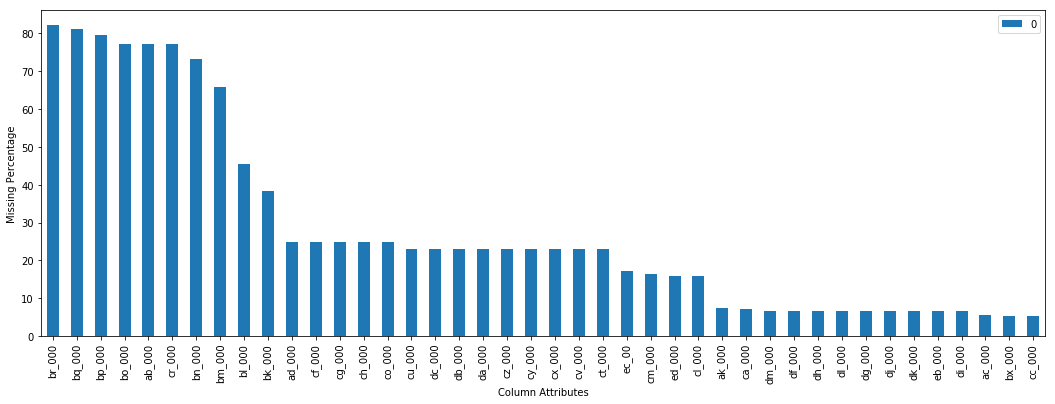

In [731]:
pd.set_option('display.max_columns', 180)
pd.set_option('display.max_rows', 180)
train_df = pd.read_csv('aps_failure_training_set.csv', na_values = 'na')
train_df['class'] = train_df['class'].map({'neg': 0, 'pos': 1})


# hist_cols_prefix = ['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']

col_miss = train_df.isna().sum().div(train_df.shape[0]).mul(100).to_frame()
ax = col_miss[col_miss[0] > 5.0].sort_values(by = 0, ascending = False).plot(kind='bar', figsize=(18,6))
ax.set_ylabel('Missing Percentage')
ax.set_xlabel('Column Attributes')
# col_drop = col_miss[col_miss[0] > 70.0].index.values.tolist()

# # d70_train_df = train_df.drop(col_drop, axis = 1)
# d70_train_df = train_df
# d70_train_df.head()


In [403]:
train_df.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0


In [404]:
from fancyimpute import KNN, SimpleFill
import random

d70_train_df['class'] = d70_train_df['class'].map({'neg': 0, 'pos': 1})
y = d70_train_df.loc[:, 'class']
X = d70_train_df.drop('class', axis=1)

X_pos = d70_train_df[d70_train_df['class'] == 0]
X_pos = X_pos.sample(frac=0.3, random_state=1)
X_downsam = pd.concat([X_pos, d70_train_df[d70_train_df['class'] == 1]])

y_downsam = X_downsam['class']
X_downsam = X_downsam.drop('class', axis=1)

X_col_miss = X.isna().sum().div(d70_train_df.shape[0]).mul(100).to_frame().index.values.tolist()
# for col in ['bm_000', 'bl_000', 'cu_000']:
#     sample = X_test[X_test[col].notnull()][:2000]
#     sample = sample[col]
#     row_idx = sample.index.values.tolist()
#     perm = np.random.permutation(500)
#     perm_idx = [row_idx[a] for a in perm]
#     sample_m = sample.copy()
#     sample_m[perm_idx] = math.nan
#     SF = SimpleFill('median').fit_transform(sample_m.to_frame())
#     simpleFill_mse = ((SF[perm_idx] - sample[perm_idx].to_frame()) ** 2).mean()
#     print(simpleFill_mse)
#     kn = KNN(k=3).fit_transform(sample_m.to_frame())
#     kn_mse = ((kn[perm_idx] - sample[perm_idx].to_frame()) ** 2).mean()
#     print(kn_mse)
    
    
header = list(X)

X_med = pd.DataFrame(SimpleFill('median').fit_transform(X), columns = header)
# X_knn = pd.DataFrame(KNN(k=6).fit_transform(X_test), columns = header)



In [390]:
X_med.describe()


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.0,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.00000,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,0.162500,3.362258e+08,1.434383e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,8.760054e+04,4.322495e+05,1.097947e+06,1.649682e+06,4.950590e+05,3.519207e+04,5.057553e+03,1.801250e+06,8.922438e+03,1.131685e+03,9.076607e+02,5.849778e+04,9.230343e+04,3.444533e+06,2.989101e+06,9.972380e+05,4.398167e+05,0.474367,1.254079e+02,5.018874e+03,2.281631e+02,1076.083167,361.475267,1.207508e+04,1.007616e+04,1.085226e+04,7.144976e+03,1.044784e+04,1.107268e+05,1.068370e+06,1.532641e+06,1.040428e+06,1.149620e+03,7.785286e+03,4.378664e+03,7.987238e+03,8.630510e+04,1.461293e+06,2.11

In [722]:
def print_perf_summary(y_test, y_pred):
    cost_1 = 10
    cost_2 = 500 
    print(classification_report(y_test, y_pred))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    total_costs = cost_1*fp + cost_2*fn
    print('true neg: {0} false pos: {1} false neg: {2} true pos: {3}'.format(tn, fp, fn, tp))
    print('Total costs: ', total_costs)

In [724]:
X_pos = train_df[train_df['class'] == 0]
X_pos = X_pos.sample(frac=0.3, random_state=1)
X_downsam = pd.concat([X_pos, train_df[train_df['class'] == 1]])
y_downsam = X_downsam['class']
X_downsam = X_downsam.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_downsam.replace(math.nan, -1), y_downsam, 
                                                stratify=y_downsam, test_size = 0.6, random_state=0)

rf_classifier = RandomForestClassifier(class_weight='balanced_subsample', n_estimators=300, random_state=33)

rf_classifier.fit(X_train, y_train)
print(rf_classifier)

y_pred = rf_classifier.predict(X_test)

print_perf_summary(y_test, y_pred)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=33, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10620
           1       0.88      0.72      0.79       600

    accuracy                           0.98     11220
   macro avg       0.93      0.86      0.89     11220
weighted avg       0.98      0.98      0.98     11220

true neg: 10561 false pos: 59 false neg: 169 true pos: 431
Total costs:  85090


In [725]:
y_pred_pr = rf_classifier.predict_proba(X_test)
print('Average probability for class pos:', y_pred_pr[:,1].mean())

y_pred_prob = (y_pred_pr[:,1] > 0.05).astype(int)

print_perf_summary(y_test, y_pred_prob)

Average probability for class pos: 0.0489812834224599
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     10620
           1       0.46      0.98      0.63       600

    accuracy                           0.94     11220
   macro avg       0.73      0.96      0.80     11220
weighted avg       0.97      0.94      0.95     11220

true neg: 9925 false pos: 695 false neg: 9 true pos: 591
Total costs:  11450


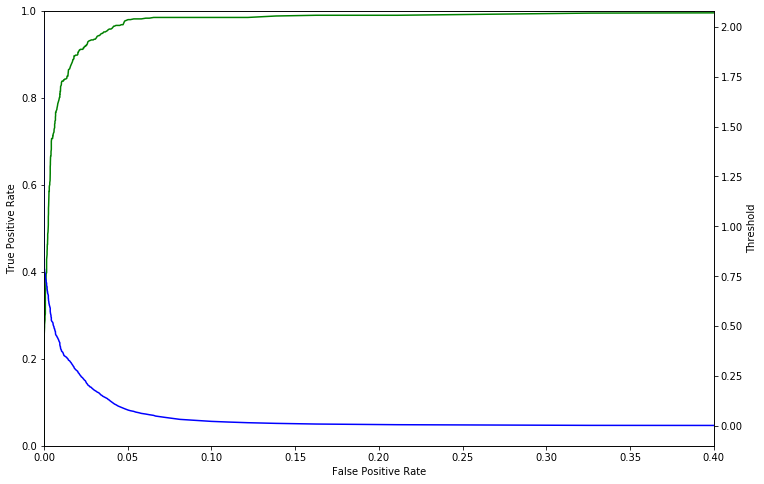

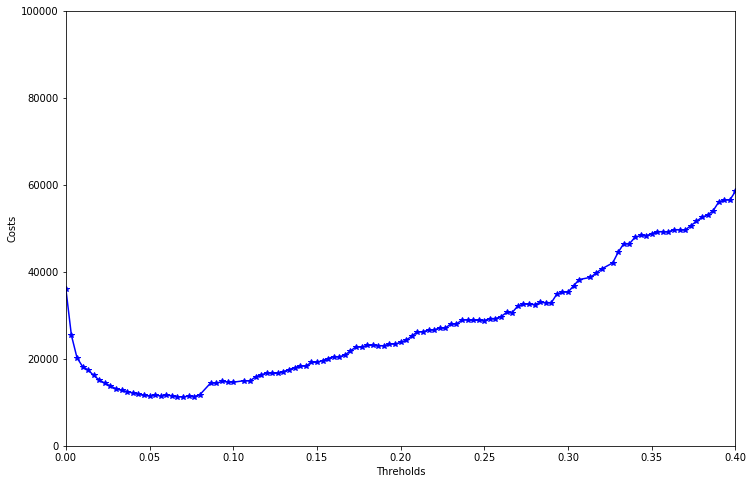

In [726]:
fpr, tpr, thres = roc_curve(y_test, y_pred_pr[:,1])
auc_score = auc(fpr, tpr)
score = y_pred_pr[:,1]
best = None
min_cost= None
costs = []

plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0,1)
plt.xlim(0,0.4)

ax2 = plt.gca().twinx()
ax2.plot(fpr, thres, color='blue')
ax2.set_ylabel('Threshold')
plt.show()

for th in thres:
    y_pred_prob = (score > th).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_prob).ravel()
    total_costs = cost_1*fp + cost_2*fn
    costs.append(total_costs)
    if not min_cost or min_cost > total_costs:
        min_cost = total_costs
        best = th

plt.figure(figsize=(12,8))
plt.plot(thres, costs, marker='*', color='blue')
plt.xlabel('Threholds')
plt.ylabel('Costs')
plt.ylim(0,100000)
plt.xlim(0,0.4)
plt.show()

In [727]:
test_df = pd.read_csv('aps_failure_test_set.csv', na_values = 'na')
y_t = test_df['class'].map({'neg': 0, 'pos': 1})

X_t = test_df.drop(['class'], axis=1)

y_t_pred = rf_classifier.predict(X_t.replace(math.nan, -1))
y_t_proba_pred = rf_classifier.predict_proba(X_t.replace(math.nan, -1))
y_t_pred = (y_t_proba_pred[:,1] > best).astype(int)

print_perf_summary(y_t, y_t_pred)
print('Optimal threshold:', best)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     15625
           1       0.33      0.99      0.49       375

    accuracy                           0.95     16000
   macro avg       0.66      0.97      0.73     16000
weighted avg       0.98      0.95      0.96     16000

true neg: 14856 false pos: 769 false neg: 4 true pos: 371
Total costs:  9690
Optimal threshold: 0.07


In [635]:
params = [{'n_estimator': [200, 300], 'gamma': [1, 2, 3], 'learning_rate':[0.5, 0.1, 0.05], 'subsample': [0.3, 0.5, 0.7], 
          'colsample_bytree': [0.6, 0.8], 'colsample_bylevel': [0.6, 0.8], 
           'scale_pos_weight': [1, 0.9, 0.8]}]

xgb_clf = xgb.XGBClassifier(class_weight='balanced_subsample', seed=33)
#                             n_estimators=200,
#                            colsample_bylevel=1, colsample_bytree=0.6, gamma=1, learning_rate=0.1, 
#                             scale_pos_weight=0.7)

gscv_clf = GridSearchCV(xgb_clf, params, cv=3, n_jobs=2, verbose=1, scoring='roc_auc')
gscv_clf.fit(X_train, y_train)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  7.2min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 14.9min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 29.0min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed: 42.0min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed: 58.8min
[Parallel(n_jobs=2)]: Done 1944 out of 1944 | elapsed: 63.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced_subsample',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, re...
                                     scale_pos_weight=1, seed=33, silent=True,
                                     subsample=1),
             iid='warn', n_jobs=2,
             param_grid=[{'colsample_bylevel': [0.6, 0.8],
                          'colsample_bytree': [0.6, 0.8], 'gamma': [1, 2, 3],
                 

XGBClassifier(base_score=0.5, booster='gbtree',
              class_weight='balanced_subsample', colsample_bylevel=0.6,
              colsample_bytree=0.6, gamma=2, learning_rate=0.1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimator=200, n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=0.8, seed=33, silent=True,
              subsample=0.7)

Best parameters:  {'colsample_bylevel': 0.6, 'colsample_bytree': 0.6, 'gamma': 2, 'learning_rate': 0.1, 'n_estimator': 200, 'scale_pos_weight': 0.8, 'subsample': 0.7}


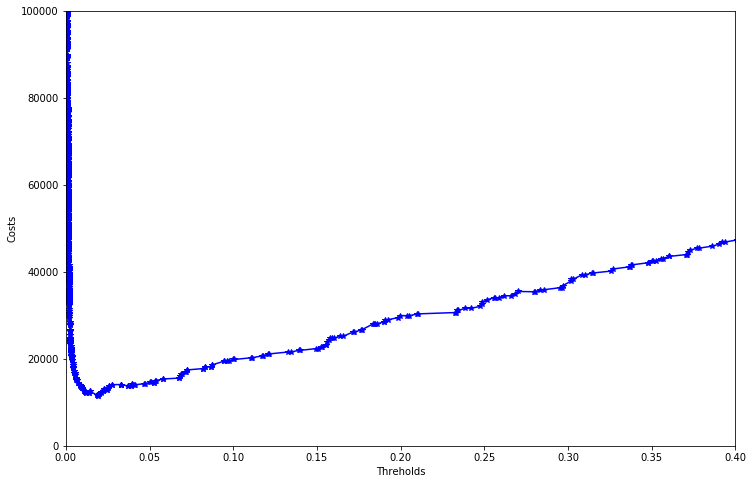

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10620
           1       0.89      0.82      0.85       600

    accuracy                           0.98     11220
   macro avg       0.94      0.91      0.92     11220
weighted avg       0.98      0.98      0.98     11220

true neg: 10558 false pos: 62 false neg: 107 true pos: 493
Total costs:  54120
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     10620
           1       0.48      0.98      0.64       600

    accuracy                           0.94     11220
   macro avg       0.74      0.96      0.80     11220
weighted avg       0.97      0.94      0.95     11220

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     10620
           1       0.48      0.98      0.64       600

    accuracy                           0.94     11220
   macro avg       0.74      0.96      0.80     1

In [728]:
print(gscv_clf.best_estimator_)
# params_tup = gscv_clf.cv_results_['params']
# mean_train_score = gscv_clf.cv_results_['mean_train_score']
# mean_test_score = gscv_clf.cv_results_['mean_test_score']

# for i in range(0, len(params_tup)):
#     print('Training:\t', params_tup[i], ' - ', round(mean_train_score[i],3))
#     print('Test:\t\t', params_tup[i], ' - ', round(mean_test_score[i],3))
estimator = gscv_clf.best_estimator_
print('\nBest parameters: ', gscv_clf.best_params_)
params = gscv_clf.best_params_
y_pred = gscv_clf.predict(X_test)
y_pred_pr = gscv_clf.predict_proba(X_test)

xgb_fpr, xgb_tpr, xgb_thres = roc_curve(y_test, y_pred_pr[:,1])
auc_score = auc(fpr, tpr)
score = y_pred_pr[:,1]
best = None
min_cost= None
costs = []

for th in xgb_thres:
    y_pred_prob = (score > th).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_prob).ravel()
    total_costs = cost_1*fp + cost_2*fn
    costs.append(total_costs)
    if not min_cost or min_cost > total_costs:
        min_cost = total_costs
        best = th

plt.figure(figsize=(12,8))
plt.plot(xgb_thres, costs, marker='*', color='blue')
plt.xlabel('Threholds')
plt.ylabel('Costs')
plt.ylim(0,100000)
plt.xlim(0,0.4)
plt.show()

print_perf_summary(y_test, y_pred)

y_pred_prob = (y_pred_pr[:,1] > best).astype(int)
print(classification_report(y_test, y_pred_prob))
print_perf_summary(y_test, y_pred_prob)
print('Optimal threshold:', best)

In [730]:
y_t_pred = gscv_clf.predict(X_t.replace(math.nan, -1))
y_t_proba_pred = gscv_clf.predict_proba(X_t.replace(math.nan, -1))
y_t_pred = (y_t_proba_pred[:,1] > best).astype(int)

print_perf_summary(y_t, y_t_pred)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     15625
           1       0.29      0.99      0.45       375

    accuracy                           0.94     16000
   macro avg       0.65      0.97      0.71     16000
weighted avg       0.98      0.94      0.96     16000

true neg: 14726 false pos: 899 false neg: 3 true pos: 372
Total costs:  10490


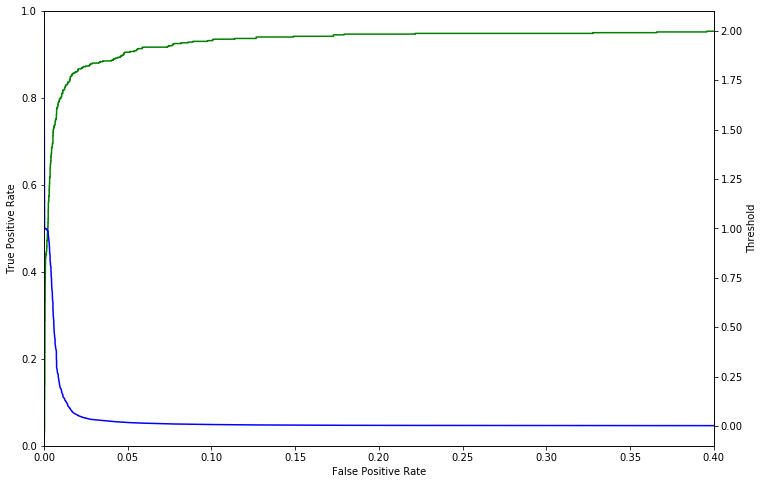

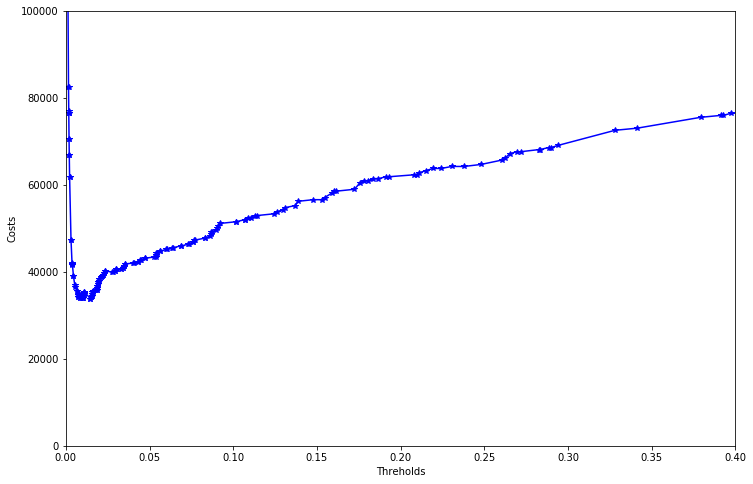

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14160
           1       0.84      0.73      0.78       600

    accuracy                           0.98     14760
   macro avg       0.92      0.86      0.89     14760
weighted avg       0.98      0.98      0.98     14760

true neg: 14078 false pos: 82 false neg: 160 true pos: 440
Total costs:  80820
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     14160
           1       0.40      0.92      0.55       600

    accuracy                           0.94     14760
   macro avg       0.70      0.93      0.76     14760
weighted avg       0.97      0.94      0.95     14760

true neg: 13329 false pos: 831 false neg: 51 true pos: 549
Total costs:  33810
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     15625
           1       0.18      0.95      0.31       375

    accuracy            

In [719]:
std_scaler = preprocessing.StandardScaler()

X_pos = train_df[train_df['class'] == 0]
X_pos = X_pos.sample(frac=0.4, random_state=1)
X_downsam = pd.concat([X_pos, train_df[train_df['class'] == 1]])
y_downsam = X_downsam['class']
X_downsam = X_downsam.drop('class', axis=1)
header = list(X_downsam)
X_downsam = pd.DataFrame(std_scaler.fit_transform(X_downsam.replace(math.nan, -1)), columns=header)

X_train, X_test, y_train, y_test = train_test_split(X_downsam, y_downsam, 
                                                stratify=y_downsam, test_size = 0.6, random_state=0)


logis_classifier = LogisticRegression(solver='lbfgs', class_weight='balanced_subsample', C=6, max_iter=10000, random_state=2)
logis_classifier.fit(X_train, y_train)

y_pred = logis_classifier.predict(X_test)
y_pred_pr = logis_classifier.predict_proba(X_test)

logis_fpr, logis_tpr, logis_thres = roc_curve(y_test, y_pred_pr[:,1])
auc_score = auc(fpr, tpr)
score = y_pred_pr[:,1]
best = None
min_cost= None
costs = []

plt.figure(figsize=(12,8))
plt.plot(logis_fpr, logis_tpr, color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0,1)
plt.xlim(0,0.4)

ax2 = plt.gca().twinx()
ax2.plot(logis_fpr, logis_thres, color='blue')
ax2.set_ylabel('Threshold')
plt.show()

for th in logis_thres:
    y_pred_prob = (score > th).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_prob).ravel()
    total_costs = cost_1*fp + cost_2*fn
    costs.append(total_costs)
    if not min_cost or min_cost > total_costs:
        min_cost = total_costs
        best = th

plt.figure(figsize=(12,8))
plt.plot(logis_thres, costs, marker='*', color='blue')
plt.xlabel('Threholds')
plt.ylabel('Costs')
plt.ylim(0,100000)
plt.xlim(0,0.4)
plt.show()


y_pred_prob = (y_pred_pr[:,1] > best).astype(int)

print_perf_summary(y_test, y_pred)
print_perf_summary(y_test, y_pred_prob)

X_t_std = pd.DataFrame(std_scaler.fit_transform(X_t.replace(math.nan, -1)), columns=header)
y_t_proba_pred = logis_classifier.predict_proba(X_t_std)
y_t_pred = (y_t_proba_pred[:,1] > best).astype(int)

print_perf_summary(y_t, y_t_pred)
print('Optimal threshold:', best)


In [37]:
pca = PCA(0.85)
pca.fit(X_med_l1)

X_med_l1_pca = pca.fit_transform(X_med_l1)
X_train, X_test, y_train, y_test = train_test_split(X_med_l1_pca, y, test_size = 0.3, random_state=0)

print(X_med_l1_pca)


[[ 0.80265033  0.03026415]
 [-0.13269613 -0.14085887]
 [-0.13293495 -0.13046812]
 ...
 [ 0.86299076  0.0422081 ]
 [ 0.78505266  0.02406246]
 [-0.14705064 -0.20899362]]
